In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#DATA CLEANING


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/police_project.csv')

In [3]:
df.drop('county_name',axis=1,inplace=True)
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['stop_time'] = pd.to_datetime(df['stop_time'])
df['stop_duration'] = df['stop_duration'].str.replace(' Min','')

# 0 and 'Not Listed' Represents Null values
df['driver_age_raw'].fillna(0,inplace=True)
df['driver_age'].fillna(0,inplace=True)
df['stop_duration'].fillna(0,inplace=True)

df['violation_raw'].fillna('Not Listed',inplace=True)
df['driver_race'].fillna('Not Listed',inplace=True)
df['driver_gender'].fillna('Not Listed',inplace=True)
df['search_type'].fillna('Not Listed',inplace=True)
df['stop_outcome'].fillna('Not Listed',inplace=True)
df['is_arrested'].fillna('Not Listed',inplace=True)
df['violation'].fillna('Not Listed',inplace=True)

#Analysing the Data And Answering the Questions:-

##1. Do men or women speed more often?  


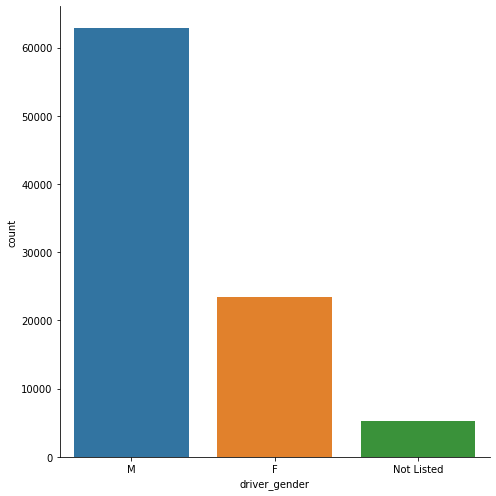

In [4]:
sns.catplot('driver_gender', data=df, kind="count", height=7)

In [5]:
print(df[df['violation']=='Speeding'].driver_gender.value_counts(normalize=True))
print("\n*It has been shown that 68 percent of total population that are fined for speeding are males.\
       \n Hence for conclusion, Men Speed more often than Women.")

M             0.680499
F             0.319460
Not Listed    0.000041
Name: driver_gender, dtype: float64

*It has been shown that 68 percent of total population that are fined for speeding are males.       
 Hence for conclusion, Men Speed more often than Women.


##2. Does gender affect who gets searched during a stop?

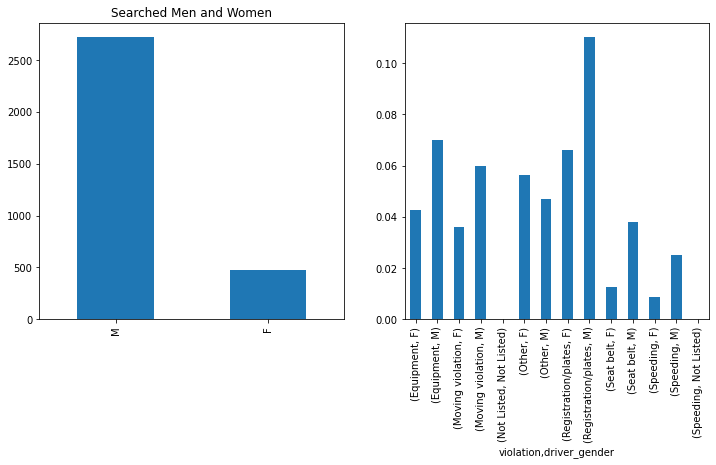

In [6]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.loc[df.search_conducted, 'driver_gender'].value_counts().plot(kind="bar")
plt.title("Searched Men and Women")

plt.subplot(2, 2, 2)
df.groupby(['violation', 'driver_gender']).search_conducted.mean().plot(kind="bar")

In [7]:
print(df.groupby('search_conducted').driver_gender.value_counts(normalize=True))
print("\n*As we can see 85 percent of total searches are conducted on Male and the same is also observable from the shown graphs.\
       \n Hence, we can conclude that gender does affect who gets searched during a stop.")

search_conducted  driver_gender
False             M                0.679541
                  F                0.260207
                  Not Listed       0.060252
True              M                0.852628
                  F                0.147372
Name: driver_gender, dtype: float64

*As we can see 85 percent of total searches are conducted on Male and the same is also observable from the shown graphs.       
 Hence, we can conclude that gender does affect who gets searched during a stop.


##3. During a search, how often is the driver frisked?  


In [8]:
print(df.search_type.value_counts())
count=df['search_type'].str.contains('Protective Frisk').sum()

Not Listed                                                  88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [9]:
print("\n*If we calculate the total number of times a driver is frisked, then the total sums up to",count,'.')


*If we calculate the total number of times a driver is frisked, then the total sums up to 274 .



##4. Which year had the least number of stops?  


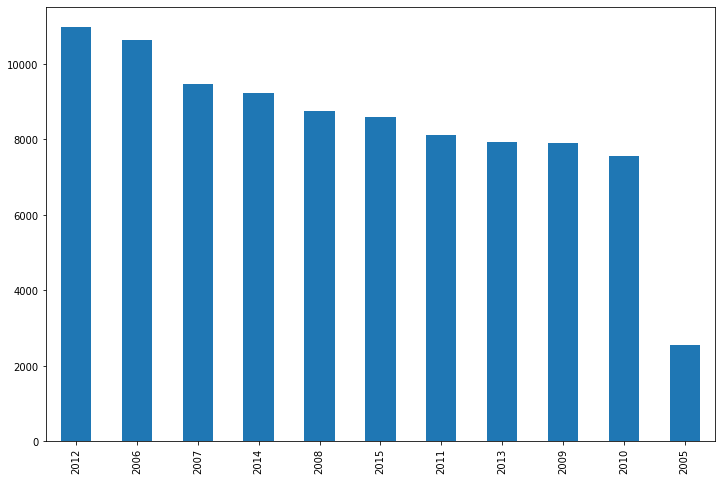

In [10]:
df1 = df.copy()
df1['YEAR'] = pd.DatetimeIndex(df.stop_date).year
df2 = pd.DataFrame()
plt.figure(figsize=(12, 8))
df1.YEAR.value_counts().plot(kind="bar")

In [11]:
# print(df1.groupby('YEAR').stop_outcome.count().sort_values())
print("\n*As we can see the number of stops are least in year 2005.")


*As we can see the number of stops are least in year 2005.


##5. How does drug activity change by time of day?


In [12]:
day_time = df[(df['stop_time'] > '05:00:00') & (df['stop_time'] <= '19:59:00')]

In [13]:
df3 = day_time[['stop_time','drugs_related_stop']].copy()
# print(df3[df3.drugs_related_stop==True].count)
day_time_stoppage = df3[df3.drugs_related_stop==True]['drugs_related_stop'].count()
total_stoppage = df[df.drugs_related_stop==True]['drugs_related_stop'].count()

In [14]:
print("*As the total stoppages are {0} and stoppages during day time are {1},\
     \n We can conclude that most drug related stoppages occur at night time as more than half of drug related stopagges happen at night.".format(day_time_stoppage,total_stoppage))

*As the total stoppages are 397 and stoppages during day time are 815,     
 We can conclude that most drug related stoppages occur at night time as more than half of drug related stopagges happen at night.


##Do most stops occur at night?

In [15]:
night_time = df[(df['stop_time'] >= '20:00:00') & (df['stop_time'] == '00:00:00') | ((df['stop_time'] >= '00:00:00') & (df['stop_time'] < '04:59:00'))]

In [16]:
df4 = night_time[['stop_time']].copy()
night_stops = df4.stop_time.count()
total_stops = df.stop_time.count()
print("*Total stops that occur are {0} and stops that occur only at night are {1}.\
        \nAs we can see that stops occuring at night are less than half of total stops, we can conclude that ".format(total_stops,night_stops))

*Total stops that occur are 91741 and stops that occur only at night are 14062.        
As we can see that stops occuring at night are less than half of total stops, we can conclude that 
